# rdkit2ase example

# install packmol and rdkit2ase
!julia -e 'import Pkg; Pkg.add("Packmol")'
!pip install rdkit2ase

In [ ]:
import ase
from ase.visualize import view
from rdkit import Chem

import rdkit2ase

In [2]:
water: list[ase.Atoms] = rdkit2ase.smiles2conformers("O", numConfs=10)
acetic_acid: list[ase.Atoms] = rdkit2ase.smiles2conformers("CC(=O)O", numConfs=10)
view(acetic_acid[0], viewer="x3d")

In [3]:
box = rdkit2ase.pack(
    data=[water, acetic_acid], counts=[10, 10], density=800, packmol="packmol.jl"
)

In [4]:
view(box, viewer="x3d")

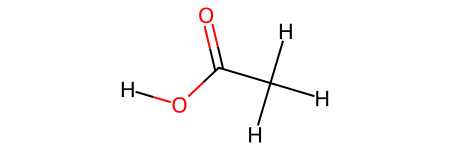

In [5]:
mol: Chem.Mol = rdkit2ase.ase2rdkit(acetic_acid[0])
mol

In [6]:
acetic_acid[0].info["connectivity"]

[(0, 1, 1.0),
 (1, 2, 2.0),
 (1, 3, 1.0),
 (0, 4, 1.0),
 (0, 5, 1.0),
 (0, 6, 1.0),
 (3, 7, 1.0)]

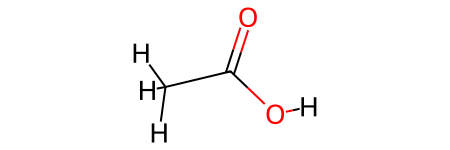

In [7]:
# Structures without connectivity information can also be converted to RDKit molecules.
acetic_acid[0].info.pop("connectivity")
mol: Chem.Mol = rdkit2ase.ase2rdkit(acetic_acid[0])
mol

In [13]:
pattern = "[C;H3]([H])([H])[H]"
fragments = rdkit2ase.get_substructures(acetic_acid[0], pattern=pattern)
print(rdkit2ase.match_substructure(acetic_acid[0], pattern=pattern))
print(fragments)
view(fragments[0], viewer="x3d")

((0, 4, 5, 6),)
[Atoms(symbols='CH3', pbc=False)]
